In [1]:
import pandas as pd
import numpy as np
import os

from scipy.interpolate import interp1d
import statsmodels.api as sm

下读入五个显著相关的数据（科研投入、高新企业数量、出口货物、零售、就业情况），并对缺失数据进行线性插值和数据外推处理。

In [2]:
data_dir = os.path.join(os.getcwd(), 'data')

gdp_data = pd.read_excel(os.path.join(data_dir,'GDP.xlsx'))
factors = ['科研投入', '高科技企业数量', '出口货值', '零售', '就业情况']
factors_data = [pd.read_excel(os.path.join(data_dir, f'selected', f'{factor}.xlsx')) for factor in factors]

def interpolate(data, start, end):
    x = data['年份']
    y = data['大湾区汇总'].interpolate(method='linear')
    # 进行数据外推，针对'科研投入'和'高科技企业数量'两个因素
    f = interp1d(x, y, kind='linear', bounds_error=False, fill_value="extrapolate")
    new_x = np.arange(start, end + 1)
    new_y = f(new_x)
    new_y = np.maximum(new_y, 0)
    return pd.Series(new_y, index=new_x)

all_factors = pd.DataFrame(index=range(1999,2024))

cnt = 0
for factor in factors_data:
    interpolated_data = interpolate(factor, 1999, 2024)
    # 防止有遗漏的NA值
    interpolated_data = interpolated_data.interpolate(method='linear')
    all_factors[factors[cnt]] = interpolated_data
    cnt += 1
print(all_factors)

         科研投入  高科技企业数量         出口货值           零售       就业情况
1999     0.00      0.0  2079.020000   2102.66000  1758.6600
2000     0.00      0.0  2428.210700   3290.77000  2243.1900
2001     0.00      0.0  2339.230000   3497.10000  2292.8900
2002     0.00      0.0  2547.390000   3913.14000  2376.4200
2003     0.00      0.0  2915.390000   4402.42000  2590.0300
2004     0.00      0.0  3451.980000   5019.48000  2841.5300
2005     0.00      0.0  3909.402337   8148.64000  3180.0100
2006     0.00      0.0  4397.810000   8967.24000  3358.8400
2007     0.00      0.0  4946.930000  10514.23000  3484.3724
2008   149.46      0.0  5292.050000  12464.94000  3614.9962
2009   359.21      0.0  4618.630000  13805.69000  3790.0489
2010   568.96      0.0  5702.567179  16617.22000  4060.7400
2011   778.71      0.0  6342.228130  19608.02000  4020.6155
2012   988.46      0.0  6612.590000  21789.56000  4038.9700
2013  1198.21      0.0  6986.815800  24243.11000  4431.9400
2014  1407.96   1055.0  7315.999500  268

下构建多元线性回归模型

In [3]:
X = all_factors
Y = gdp_data['大湾区汇总']
Y.index = gdp_data['年']

# 使用statsmodel库构建多元线性回归模型
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  大湾区汇总   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2189.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           1.55e-25
Time:                        02:36:47   Log-Likelihood:                -220.75
No. Observations:                  25   AIC:                             453.5
Df Residuals:                      19   BIC:                             460.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.246e+04   3853.930      3.233      0.0

最终得到
**大湾区的GDP多元线性回归模型方程**

**GDP** = **6.2164** × 科研投入 + **0.1391** × 高科技企业数量 + **1.0911** × 出口货值 + **1.9093** × 零售 + **0.9989** × 就业情况 + **12460**

其中：
- 6.2164 是科研投入的系数。
- 0.1391 是高科技企业数量的系数。
- 1.0911 是出口货值的系数。
- 1.9093 是零售的系数。
- 0.9989 是就业情况的系数。
- 12460 是常数项。

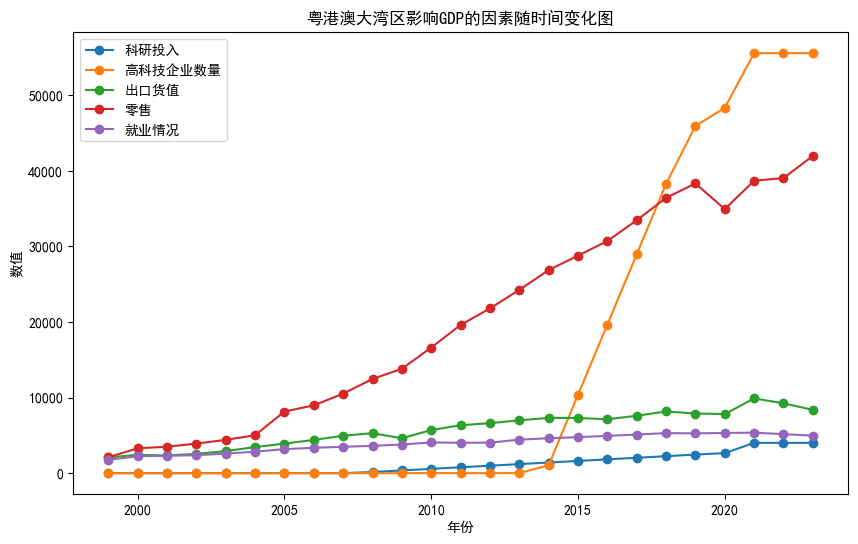

In [14]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(10, 6))
for column in all_factors.columns:
    plt.plot(all_factors.index, all_factors[column], marker='o', label=column)
    
plt.legend()

plt.title('粤港澳大湾区影响GDP的因素随时间变化图')
plt.xlabel('年份')
plt.ylabel('数值')

plt.show()

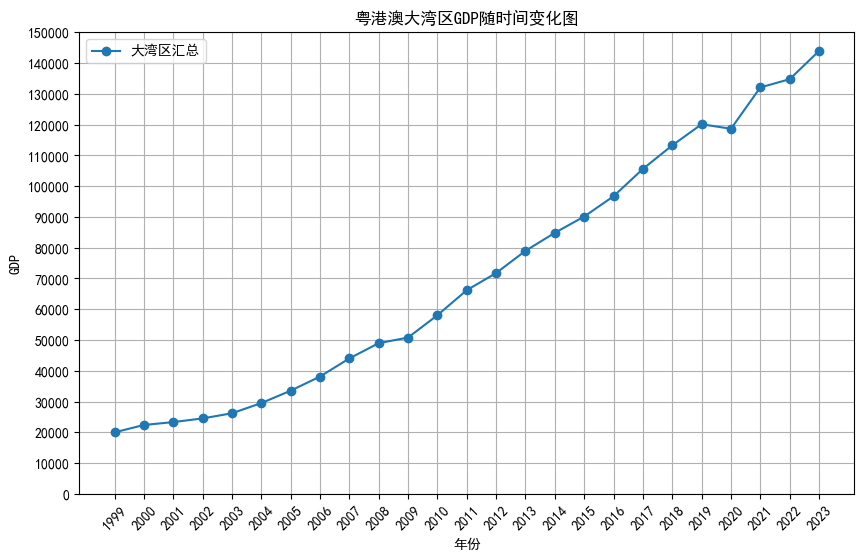

In [16]:
plt.figure(figsize=(10, 6))
gdp_data.index = range(1999,2024)
plt.plot(gdp_data.index, gdp_data['大湾区汇总'], marker='o', label='大湾区汇总')
    
plt.legend()

plt.title('粤港澳大湾区GDP随时间变化图')
plt.xlabel('年份')
plt.ylabel('GDP')
plt.xticks(gdp_data.index, rotation=45)
plt.yticks(range(0,160000,10000))
plt.grid(True)

plt.show()